₩# 단순 선형 회귀

# < 사이킷런에서 최소제곱법으로 단순 선형회귀 수행 >

### 필요한 모듈 import

In [1]:
import pandas as pd

In [2]:
import os
print(os.getcwdb)

<built-in function getcwdb>


# 1. 맥주 데이터를 활용한 단순 선형 회귀 실습

### 데이터 수집

In [3]:
beer = pd.read_csv('/Users/kimminsoo/Desktop/ML/data/data_선형회귀/beer.csv')
beer

,beer,temperature
0,45.3,20.5
1,59.3,25.0
2,40.4,10.0
3,38.0,26.9
4,37.0,15.8
5,40.9,4.2
6,60.2,13.5
7,63.3,26.0
8,51.1,23.3
9,44.9,8.5


### 데이터 탐색

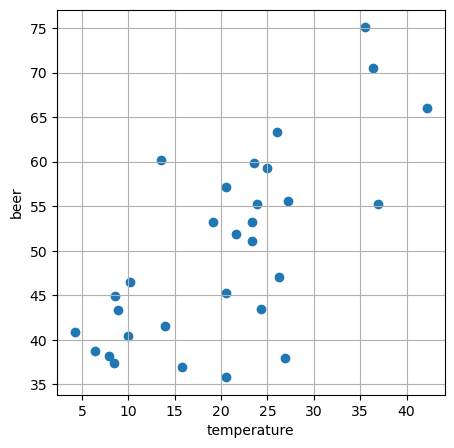

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(x=beer['temperature'], y=beer['beer'])
plt.xlabel('temperature')
plt.ylabel('beer')
plt.grid()

In [5]:
# 독립 변수, 종속 변수 확인
# 독립변수
beer.temperature


0     20.5
1     25.0
2     10.0
3     26.9
4     15.8
5      4.2
6     13.5
7     26.0
8     23.3
9      8.5
10    26.2
11    19.1
12    24.3
13    23.3
14     8.4
15    23.5
16    13.9
17    35.5
18    27.2
19    20.5
20    10.2
21    20.5
22    21.6
23     7.9
24    42.2
25    23.9
26    36.9
27     8.9
28    36.4
29     6.4
Name: temperature, dtype: float64

In [6]:
# 종속 변수 확인, 레코드 수 확인
# 종속변수 확인
beer.beer

0     45.3
1     59.3
2     40.4
3     38.0
4     37.0
5     40.9
6     60.2
7     63.3
8     51.1
9     44.9
10    47.0
11    53.2
12    43.5
13    53.2
14    37.4
15    59.9
16    41.5
17    75.1
18    55.6
19    57.2
20    46.5
21    35.8
22    51.9
23    38.2
24    66.0
25    55.3
26    55.3
27    43.3
28    70.5
29    38.8
Name: beer, dtype: float64

In [7]:
# 레코드 수 확인
len(beer)

30

###  데이터 준비 - 학습용 / 검증용 데이터 분리

In [8]:
import numpy as np
# 전체 데이터 중 80%는 학습용, 20%는 검증용으로 분리


#독립변수, 종속변수 데이터셋 준비
## 독립변수를 2차원으로 변환
x = np.array(beer.temperature).reshape((-1,1))

## 종석변수 데이터셋 준비
y = np.array(beer.beer)

In [9]:
# 학습용 검증용 데이터셋 준비
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [10]:
len(x_train), len(x_test), len(y_train), len(y_test)

(24, 6, 24, 6)

### 모델 구축

In [11]:

#모델 클래스 선택 후 인스턴스 객체 생성

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [12]:
# 학습 수행
reg = lr.fit(x_train, y_train)

In [13]:
# 계수 및 절편 확인: _속성은 학습을 통해 결정되는 속성
w1 = reg.coef_[0]
w0 = reg.intercept_

In [14]:
#회귀식
print(f'y={w1:.2f}x + {w0:.2f}')

y=0.70x + 36.07


In [15]:
# 구축된 모델에서 예측 수행
## 6개 테스트 데이터로 얻은 예측값
y_pred = reg.predict(x_test)

In [16]:
y_test

array([75.1, 35.8, 47. , 57.2, 37.4, 46.5])

### 모델 성능 평가

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#MSE

mse = mean_squared_error(y_test, y_pred)
#RMSE

rmse = np.sqrt(mse)

In [18]:
#결정계수 R2
r2 = r2_score(y_test, y_pred)

# mse, rmse, r2
## mse: 제곱의합, rmse: 제곱근(단위가 원래 단위로 바뀜)
print(mse, rmse, r2)

91.34656925529704 9.557539916489862 0.48456481297951504


### 시각화

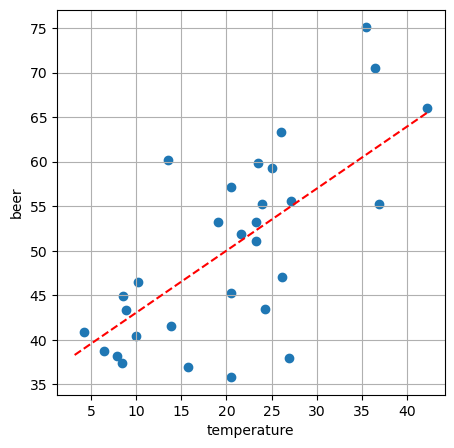

In [19]:
# y = 0.697056X + 36.06 시각화
plt.figure(figsize=(5,5))
plt.scatter(beer.temperature, beer.beer)
plt.grid()

# 수집한 데이터셋 시각화
xx = np.arange(beer['temperature'].min()-1,\
               beer['temperature'].max()+1)
yy = reg.predict(xx.reshape((-1,1)))
plt.plot(xx, yy, linestyle='--', color='red')
plt.xlabel('temperature')
plt.ylabel('beer');


# 응용1. 나이, 키의 관계를 회귀 분석

In [20]:
# 필요한 모듈 import 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### 데이터 생성/수집

In [21]:
age_height = pd.read_csv('/Users/kimminsoo/Desktop/ML/data/data_선형회귀/age_height.csv')
age_height

,age(X),height(T)
0,15.425550,170.910131
1,23.008112,160.675599
2,5.002859,129.002066
3,12.558314,159.701396
4,8.668897,155.460589
5,7.308465,140.561344
6,9.656505,153.654664
7,13.639018,159.429396
8,14.919187,164.704239
9,18.470418,169.645276


#### 데이터 탐색

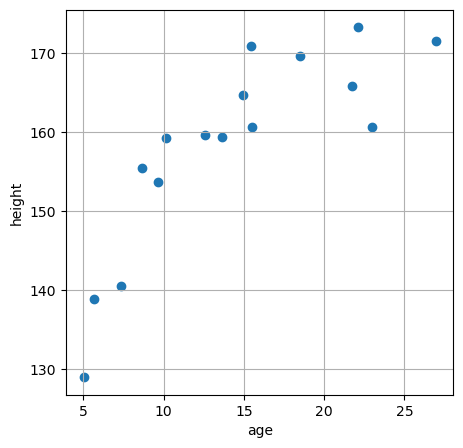

In [22]:
# 데이터 분포 시각화
plt.figure(figsize=(5,5))
plt.scatter(x=age_height['age(X)'], y=age_height['height(T)'])
plt.xlabel('age')
plt.ylabel('height')
plt.grid()

In [23]:
age_height['age(X)']

0     15.425550
1     23.008112
2      5.002859
3     12.558314
4      8.668897
5      7.308465
6      9.656505
7     13.639018
8     14.919187
9     18.470418
10    15.479863
11    22.130488
12    10.111306
13    26.952936
14     5.684690
15    21.761688
Name: age(X), dtype: float64

In [24]:
age_height['height(T)']

0     170.910131
1     160.675599
2     129.002066
3     159.701396
4     155.460589
5     140.561344
6     153.654664
7     159.429396
8     164.704239
9     169.645276
10    160.712575
11    173.287099
12    159.311932
13    171.517573
14    138.957043
15    165.874407
Name: height(T), dtype: float64

In [25]:
len(age_height)

16

#### 데이터 준비 - 학습용 / 검증용 데이터 분리

In [26]:
# 전체 데이터 중 80%는 학습용, 20%는 검증용으로 분리
x = np.array(age_height['age(X)']).reshape(-1,1)
y = np.array(age_height['height(T)'])

In [27]:
#####모델 구축 및 예측

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)
x_train

array([[ 9.65650528],
       [15.47986286],
       [ 8.66889727],
       [23.00811234],
       [ 5.68468983],
       [15.42555012],
       [21.76168775],
       [18.47041835],
       [14.91918686],
       [10.11130624],
       [22.13048751],
       [ 7.30846487]])

In [28]:
len(x_train), len(x_test), len(y_train), len(y_test)

(12, 4, 12, 4)

In [29]:
#모델 객체 생성  및 학습
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# 학습 수행
reg = lr.fit(x_train, y_train)

# 계수 및 절편 확인
w1 = reg.coef_[0]
w0 = reg.intercept_

# 구축된 모델에서 예측 수행
y_pred = reg.predict(x_test)


In [30]:
#####모델 성능 평가
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
#MSE : metrcics 모듈의 mean_squared_error() 함수 사용
#RMSE : numpy의 sqrt() 함수 사용


# MSE
mse = mean_squared_error(y_test, y_pred)
print(f'mse= {mse:.2f}')

#RMSE
rmse = np.sqrt(mse)
print(f'rmse = {rmse:.2f}')

#결정계수 R2
r2 = r2_score(y_test, y_pred)
print(r2)

#회귀식
print(f'y = {reg.coef_[0]:.2f}x + {reg.intercept_}')

## mse = 1.43

mse= 83.49
rmse = 9.14
0.6627884107222466
y = 1.44x + 138.78419382830361


Text(0, 0.5, 'height')

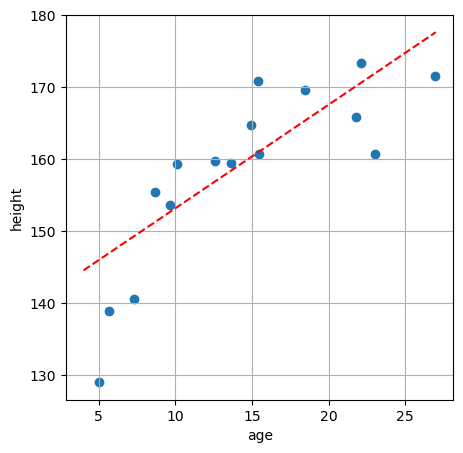

In [31]:
#나이, 키 데이터 실제 데이터 및 회귀식 시각화
plt.figure(figsize=(5,5))
plt.scatter(age_height['age(X)'], age_height['height(T)'])
plt.grid()

#y = 0.697056X + 36.06 시각화
xx = np.arange(age_height['age(X)'].min()-1, age_height['age(X)'].max()+1)
yy= reg.predict(xx.reshape((-1,1)))
plt.plot(xx, yy, ls='--', color='red')
plt.xlabel('age')
plt.ylabel('height')


# < 스탯츠모델에서 단순선형회귀 수행>

In [32]:
#스탯츠모델 import
import statsmodels.api as sm
# 맥주 데이터 
# 데이터 생성
beer = pd.read_csv('/Users/kimminsoo/Desktop/ML/data/data_선형회귀/beer.csv')

#독립변수, 종속변수 데이터셋 준비
x = np.array(beer.temperature).reshape(-1,1)
y= beer.beer

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

x_test

array([[ 1. , 35.5],
       [ 1. , 20.5],
       [ 1. , 26.2],
       [ 1. , 20.5],
       [ 1. ,  8.4],
       [ 1. , 10.2]])

In [33]:
# 스탯츠모델
lr = sm.OLS(y_train, x_train)
reg = lr.fit()

In [34]:
# 성능 평가
reg.summary()
print(reg.summary())


                            OLS Regression Results                            
Dep. Variable:                   beer   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     22.63
Date:                Mon, 13 Feb 2023   Prob (F-statistic):           9.50e-05
Time:                        21:03:10   Log-Likelihood:                -79.854
No. Observations:                  24   AIC:                             163.7
Df Residuals:                      22   BIC:                             166.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.0667      3.315     10.881      0.0

# 응용2: 농어 무게 예측

In [35]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

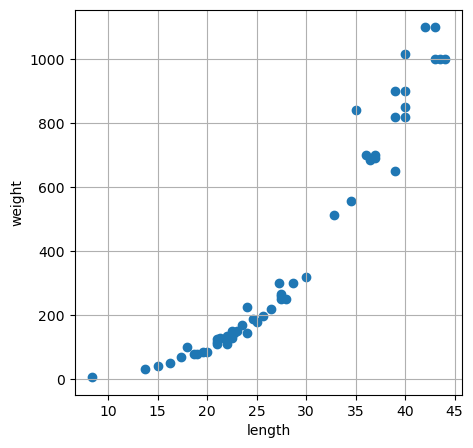

In [36]:
# 데이터 탐색

plt.figure(figsize=(5,5))
plt.scatter(x=perch_length, y=perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.grid()

In [37]:
# 데이터 준비- 학습용/검증용 데이터 분리
x = perch_length.reshape(-1,1)
y = perch_weight

x.shape, y.shape

((56, 1), (56,))

In [38]:
# 모델 구축 및 예측
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

In [39]:
len(x_train), len(x_test), len(y_train), len(y_test)

(44, 12, 44, 12)

In [40]:
# 모델 객체 생성 및 학습
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# 학습 수행
reg = lr.fit(x_train, y_train)


In [41]:
# 계수 및 절편 확인
w1 = reg.coef_[0]
w0 = reg.intercept_

print(lr.coef_, lr.intercept_)

[35.63110638] -618.3317511711567


In [42]:
# 구축된 모델에서 예측 수행
y_pred = reg.predict(x_test)

In [43]:
# 모델 성능 평가
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# MSE
mse = mean_squared_error(y_test, y_pred)
print(f'mse = {mse:.2f}')

# RMSE
rmse = np.sqrt(mse)
print(f'rmse = {rmse:.2f}')

# R2
r2 = r2_score(y_test, y_pred)
print(r2)

mse = 14550.24
rmse = 120.62
0.880333023666755


TypeError: xlabel() missing 1 required positional argument: 'xlabel'

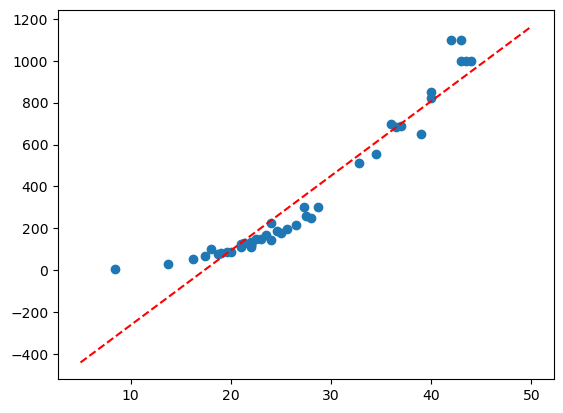

In [44]:
# 시각화
import matplotlib.pyplot as plt

plt.scatter(x_train.reshape(-1), y_train)
xx = [5, 50]
y1 = 5 * reg.coef_[0] + reg.intercept_
y2 = 50 * reg.coef_[0] + reg.intercept_

plt.plot([5,50], [y1, y2], ls='--', c='r')
plt.xlabel()
plt.ylabel();

In [ ]:
)

In [ ]:
# 스탯츠 모델
import statsmodels.api as sm

x = perch_length
y = perch_weight

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

In [ ]:
# 스탯츠모델
lr = sm.OLS(y_train, x_train)
reg = lr.fit()

In [ ]:
reg.summary()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     504.9
Date:                Tue, 07 Feb 2023   Prob (F-statistic):           4.98e-25
Time:                        14:59:13   Log-Likelihood:                -261.47
No. Observations:                  44   AIC:                             526.9
Df Residuals:                      42   BIC:                             530.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -618.3318     45.075    -13.718      0.0

# 응용3: 보스턴 집값 선형 회귀

In [ ]:
from sklearn import datasets
boston = datasets.fetch_openml('boston')
boston

/Users/kimminsoo/opt/anaconda3/lib/python3.9/site-packages/sklearn/datasets/_openml.py:292: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(


{'data':         CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  \
 0    0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0   
 1    0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0   
 2    0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0   
 3    0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0   
 4    0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0   
 ..       ...   ...    ...  ...    ...    ...   ...     ...  ..    ...   
 501  0.06263   0.0  11.93    0  0.573  6.593  69.1  2.4786   1  273.0   
 502  0.04527   0.0  11.93    0  0.573  6.120  76.7  2.2875   1  273.0   
 503  0.06076   0.0  11.93    0  0.573  6.976  91.0  2.1675   1  273.0   
 504  0.10959   0.0  11.93    0  0.573  6.794  89.3  2.3889   1  273.0   
 505  0.04741   0.0  11.93    0  0.573  6.030  80.8  2.5050   1  273.0   
 
      PTRATIO       B  LSTAT  
 0       15.3  396.90   4.98  
 1       17.8  396.90   9.14  
 2       

In [ ]:
print(type(boston.data))

<class 'pandas.core.frame.DataFrame'>


### 데이터 수집

In [ ]:
# from sklearn.datasets import load_boston

# boston = load_boston()

### 데이터 탐색

In [ ]:
dir(boston)

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'target']

In [ ]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
print(boston.data)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [ ]:
print(boston.data[:5])

[[6.3200e-03 1.8000e+01 2.3100e+00 0.0000e+00 5.3800e-01 6.5750e+00
  6.5200e+01 4.0900e+00 1.0000e+00 2.9600e+02 1.5300e+01 3.9690e+02
  4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
  7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
  9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 7.1850e+00
  6.1100e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9283e+02
  4.0300e+00]
 [3.2370e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 6.9980e+00
  4.5800e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9463e+02
  2.9400e+00]
 [6.9050e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 7.1470e+00
  5.4200e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9690e+02
  5.3300e+00]]


In [ ]:
print(boston.target[:5])

[24.  21.6 34.7 33.4 36.2]


In [ ]:
print(boston.feature_names)
print(boston.target_names)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
['MEDV']


### 데이터 준비

In [ ]:
# boston 데이터에서 독립변수(RM), 종속 변수를 각각 골라내고 데이터프레임으로 변환

In [ ]:
import pandas as pd

x = boston.RM
y = boston.target


AttributeError: RM

ValueError: x and y must be the same size

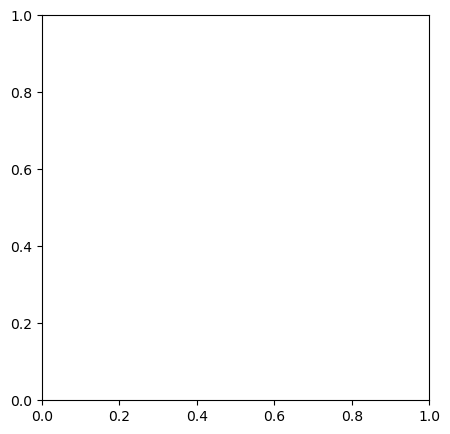

In [ ]:
#데이터 탐색
# RUM과 MEDV의 관계 시각화
plt.figure(figsize=(5,5))
plt.scatter(x, y, s=5, c='red')
plt.xlabel('room')
plt.ylabel('price')
plt.grid()


### 학습용/ 검증용 데이터 분리

In [ ]:
# 조건 : 학습 7, 검증 3
# seed  = 1로 고정
##### 5분 실습 / 결정 계수를 구하라

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, size=0.3, random_state=1)


In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
reg = lr.fit(x_train, y_train)

In [ ]:
x_train = np.array(x_train).reshape(-1,1)
x_test = np.array(x_test).reshape(-1, 1)

### 모델 구축

In [ ]:
from sklearn.metrics import

### 모델 평가

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# MSE

# RMSE

# 결정계수 R2

# 회귀계수 및 절편 확인

### 시각화

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(x, y, s=5, c='r')
xx = np.linspace(4, 9)
yy = reg.predict(xx.reshape(-1, 1))
plt.plot(xx, yy, ls='--', c='g')